# 4. Численное интегрирование. Светимость черного тела.
### Выполнил: Никитин Кирилл Юрьевич
### Группа: 3821Б1ПР2

## Шаги выполнения работы:
1. Постройте для Солнца график зависимости $\varphi(\lambda, T)$ от $\lambda$.
2. Вычислить светимость Солнца на видимой области длин волн.
3. Вычислить светимость Солнца для всех длин волн.
4. Найти светимость Солнца с помощью закона Стефана - Больцмана.
5. Найти солнечную постоянную.
6. Результаты сравнить с данными из литературы.
7. Сделать выводы.

## 1. График:

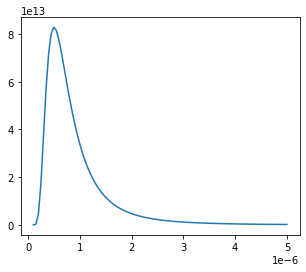

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
plt.figure(figsize = (5,4))
T = 5778
c = 2.9979*10**8
h = 6.6261*10**-34
k = 1.3806*10**-23
x = np.linspace(1*10**-7,50*10**-7,100)
y = (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T)) - 1))
plt.plot (x,y)
pass

## 2. Светимость Солнца на видимой области длин волн:

Для определения энергии, излучаемой телом в определенном диапазоне частот
$\lambda_1$, $\lambda_2$, необходимо найти следующий интеграл:
$$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$

In [33]:
a = 3.5 * (10**(-7))
b = 7 * (10**(-7))
n = 100
h1 = (b - a)/n
x = np.arange(a + h1/2, b, h1)
y = (2*np.pi*h*c**2)/((x**5)*((np.e**((h*c)/(x*k*T))-1)))

# Правило прямоугольника
I_rect = h1*sum(y)
I_rect

26456374.429090716

In [34]:
# Правило трапеции
I_trapz = integrate.trapz(y, x)
I_trapz

26239134.004388973

In [35]:
# Правило Симпсона
I_simps = integrate.simps(y, x)
I_simps

26239611.853874616

## 3. Вычислить светимость Солнца для всех длин волн: от $0$ до $\infty$ (через несобственный интеграл):


In [36]:
import scipy
def integrand (x):
  return (2*np.pi*h*c**2)/(x**5*(np.e**((h*c)/(x*k*T)) - 1))

noncI, abserr = integrate.quad(integrand, 0, np.inf)
noncI

C:\Users\User\AppData\Local\Temp\ipykernel_1252\3159490195.py:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  noncI, abserr = integrate.quad(integrand, 0, np.inf)


62936791.375977434

#### *Светимость Солнца для всех длин волн от $0$ до $\infty$ равна:*

In [37]:
sunR = 6.957 * 10**8 # Радиус Солнца
L1 = noncI * 4 * np.pi * sunR**2
L1

3.827881358837831e+26

## 4. Нахождение светимости Солнца с помощью закона Стефана - Больцмана:


In [38]:
# Радиус Солнца инициализирован выше, как "sunR"
sbConst = (2*(np.pi**5)*(k**4))/(15*(c**2)*(h**3)) # Константа Стефана-Больцмана (Вт·м^−2·К^−4)
R = sbConst * T**4 #(Вт/м^2)
L2 = R*4*np.pi*sunR**2 #(Вт)
L2

3.843397958410175e+26

## 5. Нахождение солнечной постоянной:

*Cолнечная постоянная* - мощность солнечного излучения, падающего перпендикулярно на единичную площадку на высоте верхней границы атмосферы Земли

In [39]:
S = 149.6 * 10**9 # Расстояние от Солнца до Земли (в метрах)


#### *Cолнечная постоянная равна :*

In [40]:
E = L2/(4*np.pi*S**2) #(Вт/м^2)
E

1366.6027931665326

## 6. Сравнение результатов с данными из литературы:

### *Данные из литературы (википедии) :*
#### *Солнечная светимость:* $L☉ = 3,827⋅10^{26}(Вт) $
#### *Солнечная постоянная:* $E = 1367 (Вт/м^{2})$

### *Данные, полученные в ходе решения (+сравнение данных):*
#### *1. Cветимость Солнца на видимой области длин волн:* $L☉ = 26239611.8538 (Вт)$
#### *2. Cветимость Солнца для всех длин волн:* $L☉ = 3,827⋅10^{26}(Вт) $
#### *3. Cветимость Солнца с помощью несобственного интеграла:* $L☉ = 3,827⋅10^{26}(Вт)$
#### *4. Cветимость Солнца с помощью закона Стефана - Больцмана:* $L☉ = 3,843⋅10^{26}(Вт)$
#### *5. Солнечная постоянная:* $E = 1366.6027931665326 (Вт/м^{2})$

## 7. Вывод:
#### *1. С учётом погрешности полученные результаты совпадают с данными из литературы.*
#### *2. Во втором пункте (нахождение светимость Солнца на видимой области длин волн) способы трапеции и Симпсона дают более точный результат, нежели способ прямоугольника.*
#### *3. Вычисление солнечной постоянной с помощью несобственного интеграла дали более точный результат, чем способ с приминением закона Стефана - Больцмана.*